In [30]:
import numpy as np
from sklearn.cluster.hierarchical import AgglomerativeClustering
import matplotlib.pyplot as plt
import pandas as pd
import time
from scipy.cluster.hierarchy import linkage, dendrogram
import math

In [73]:
#generate points
def get_lin_point(size=10):
x = np.random.randint(low=-10, high=10, size=size)
    k , b = np.random.randint(low=-10, high=10, size=2)
    y = x * k + b #+ np.random.randint(1, 5, size=x.size)
    data = np.column_stack((x, y))


    # plt.gca().set_aspect('equal', adjustable='box')
    fig, ax1 = plt.subplots(
        nrows=1, ncols=1,
        figsize=(4, 4)
    )
    # ax1.gca().set_aspect('equel')
    ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    plt.xlim(-100, 100)
    plt.ylim(-100, 100)
    plt.show()
    return data

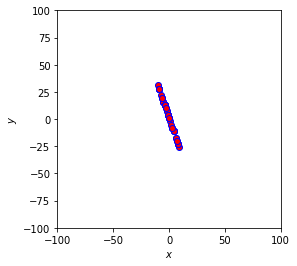

In [74]:
data = get_lin_point(50)

sklearn clustering

In [33]:
cl = AgglomerativeClustering(4, linkage='single')

In [34]:
%time
cl.fit(data)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='single', memory=None, n_clusters=4,
            pooling_func='deprecated')

In [35]:
data.shape

(50, 2)

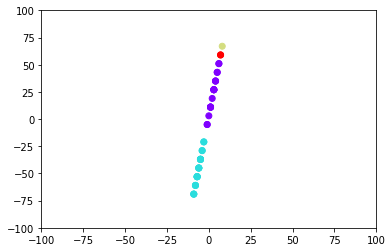

In [36]:
plt.scatter(data[:,0],data[:,1], c=cl.labels_, cmap='rainbow')  
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.show()

/home/helga/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


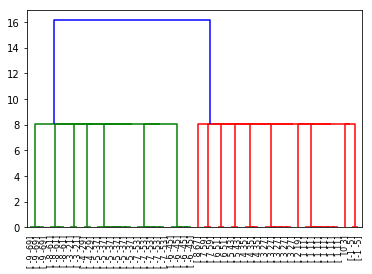

In [37]:
mergings = linkage(data, method='single')
dendrogram(mergings,labels=data)
plt.show()

In [159]:
d = pd.DataFrame(data)
# d

written clustering

In [39]:
def single_distance(clusters ,n_clusters):
    while len(clusters) is not n_clusters:
        d_min = math.inf
        # for every cluster (until second last element)
        for cluster_id, cluster in enumerate(clusters[:len(clusters)]): 
            # for each point in each cluster
            for point_id,point in enumerate(cluster): 
                # we only need to compare with clusters after the current one
                for cluster2_id, cluster2 in enumerate(clusters[(cluster_id+1):]): 
                    # go through every point in this prospective cluster as well
                    for point2_id, point2 in enumerate(cluster2):
# if this distance is better than our previous best distance then we are going to overwrite it
                        if np.linalg.norm(np.array(point)-np.array(point2)) < d_min: 
                            # Only used for comparing 
                            d_min = np.linalg.norm(np.array(point)-np.array(point2))
                # this will be used at the end to figure out which cluster to merge with which
                            clust_1 = cluster_id
                            clust_2 = cluster2_id+cluster_id+1
        clusters[clust_1].extend(clusters[clust_2]) 
        clusters.pop(clust_2)
    return(clusters)

In [127]:
%time
# initialization of clusters at first (every point is a cluster)
init_clusters=[]
for index, row in d.iterrows():
    init_clusters.append([[row[0], row[1]]])
clusters = single_distance(init_clusters, cluster_num)

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 13.1 µs


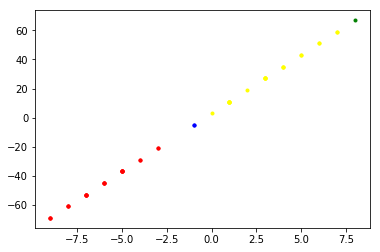

In [43]:
colors = ['red', 'yellow', 'blue', 'green']
for cluster_index, cluster in enumerate(clusters):
    for point_index, point in enumerate(cluster):
        plt.plot([point[0]], [point[1]], marker='o', markersize=3, color=colors[cluster_index])